# Covid-19 India Data Analysis

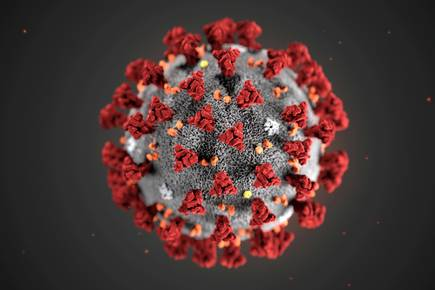

Data set is collected from kaggle:https://www.kaggle.com/imdevskp/covid19-corona-virus-india-dataset

**Context**:

  - January 30 The first case of the COVID-19 in India was reported, originating from China.
  - March 14: Central government declares COVID-19 a 'notified disaster'
  - March 15: The number of positive cases crosses 100
  - March 24: Prime Minister Narendra Modi announces 21-day lockdown
  - March 30: The number of positive cases crosses 1000

**Aim**
    
  - This Project Completely focuses on Data analysis of Covid19 in Indian.
  - Let's Perform Various Analysis inorder to find the insights behind how rampant covid19 in India.
    

### Importing Necessary Libraries




In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### Reading CSV

In [14]:
patients=pd.read_csv("Data/patients_data.csv")

In [15]:
patients.head()

,Patient Number,State Patient Number,Date Announced,Estimated Onset Date,Age Bracket,Gender,Detected City,Detected District,Detected State,State code,...,Nationality,Type of transmission,Status Change Date,Source_1,Source_2,Source_3,Backup Notes,Num cases,Entry_ID,Num Cases
0,1.0,KL-TS-P1,30/01/2020,NaN,20,F,Thrissur,Thrissur,Kerala,KL,...,India,Imported,14/02/2020,https://twitter.com/vijayanpinarayi/status/122...,https://weather.com/en-IN/india/news/news/2020...,NaN,Student from Wuhan,1.0,NaN,NaN
1,2.0,KL-AL-P1,02/02/2020,NaN,NaN,NaN,Alappuzha,Alappuzha,Kerala,KL,...,India,Imported,14/02/2020,https://www.indiatoday.in/india/story/kerala-r...,https://weather.com/en-IN/india/news/news/2020...,NaN,Student from Wuhan,1.0,NaN,NaN
2,3.0,KL-KS-P1,03/02/2020,NaN,NaN,NaN,Kasaragod,Kasaragod,Kerala,KL,...,India,Imported,14/02/2020,https://www.indiatoday.in/india/story/kerala-n...,https://twitter.com/ANI/status/122422148580539...,https://weather.com/en-IN/india/news/news/2020...,Student from Wuhan,1.0,NaN,NaN
3,4.0,DL-P1,02/03/2020,NaN,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,DL,...,India,Imported,15/03/2020,https://www.indiatoday.in/india/story/not-a-ja...,https://economictimes.indiatimes.com/news/poli...,NaN,Travel history to Italy and Austria,1.0,NaN,NaN
4,5.0,TS-P1,02/03/2020,NaN,24,M,Hyderabad,Hyderabad,Telangana,TG,...,India,Imported,02/03/2020,https://www.deccanherald.com/national/south/qu...,https://www.indiatoday.in/india/story/coronavi...,https://www.thehindu.com/news/national/coronav...,"Travel history to Dubai, Singapore contact",1.0,NaN,NaN


In [16]:
patients.shape

(100284, 23)

In [17]:
state_test=pd.read_csv("Data/tests_state_wise.csv")

In [18]:
state_test.head()

,Updated On,State,Total Tested,Tag (Total Tested),Positive,Negative,Unconfirmed,Cumulative People In Quarantine,Total People Currently in Quarantine,Tag (People in Quarantine),...,Num Calls State Helpline,Source1,Unnamed: 21,Source2,Unnamed: 23,Test positivity rate,Tests per thousand,Tests per million,Tests per positive case,Population NCP 2019 Projection
0,17/04/2020,Andaman and Nicobar Islands,1403.0,Samples Sent,12.0,1210,181.0,NaN,NaN,NaN,...,NaN,https://t.me/indiacovid/2550,NaN,NaN,NaN,0.86%,3.53,3534.0,117.0,397000.0
1,24/04/2020,Andaman and Nicobar Islands,2679.0,Samples Sent,27.0,NaN,246.0,NaN,614.0,Institutional,...,280.0,https://t.me/indiacovid/3147?single,NaN,NaN,NaN,1.01%,6.75,6748.0,99.0,397000.0
2,27/04/2020,Andaman and Nicobar Islands,2848.0,Samples Sent,33.0,NaN,106.0,NaN,724.0,Institutional,...,298.0,https://t.me/indiacovid/3365?single,NaN,NaN,NaN,1.16%,7.17,7174.0,86.0,397000.0
3,01/05/2020,Andaman and Nicobar Islands,3754.0,Samples Sent,33.0,NaN,199.0,NaN,643.0,Institutional,...,340.0,https://t.me/indiacovid/3781,NaN,NaN,NaN,0.88%,9.46,9456.0,114.0,397000.0
4,16/05/2020,Andaman and Nicobar Islands,6677.0,Samples Sent,33.0,NaN,136.0,NaN,16.0,Institutional,...,471.0,https://t.me/indiacovid/4925,NaN,NaN,NaN,0.49%,16.82,16819.0,202.0,397000.0


In [100]:
df=pd.read_csv("Data/complete.csv",index_col='Date',parse_dates=True)

In [24]:
df.head()

,Name of State / UT,Latitude,Longitude,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New deaths,New recovered
Date,,,,,,,,,
2020-01-30,Kerala,10.8505,76.2711,1,0,0,0,0,0
2020-01-31,Kerala,10.8505,76.2711,1,0,0,0,0,0
2020-02-01,Kerala,10.8505,76.2711,2,0,0,1,0,0
2020-02-02,Kerala,10.8505,76.2711,3,0,0,1,0,0
2020-02-03,Kerala,10.8505,76.2711,3,0,0,0,0,0


In [26]:
df.shape

(3370, 9)

In [32]:
len(df['Name of State / UT'].value_counts())

39

In [209]:
plt.style.use('ggplot')
sns.set_style('darkgrid')

In [224]:
india=df.groupby('Name of State / UT').sum()

In [233]:
states=india.index

In [236]:
states=['Andaman and Nicobar', 'Andhra Pradesh', 'Arunachal Pradesh',
       'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh',
       'Dadra,Nagar Haveli and Daman,Diu', 'Delhi', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir', 'Jharkhand',
       'Karnataka', 'Kerala', 'Ladakh', 'Madhya Pradesh', 'Maharashtra',
       'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Telengana',
       'Tripura', 'Union Territory of Chandigarh',
       'UT Jammu and Kashmir', 'UT Ladakh',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal']

In [255]:
india.index_col=states
india.tail()

,Latitude,Longitude,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New deaths,New recovered
UT Jammu and Kashmir,405.3384,918.9144,26,0,0,3,0,0
UT Ladakh,480.1944,1096.1048,58,0,0,8,0,0
Uttar Pradesh,3060.5238,9227.8668,488150,13050,271592,19551,596,12586
Uttarakhand,3096.8804,8138.9879,49532,518,25032,2622,35,1721
West Bengal,2252.7064,8609.7900,345017,17863,154258,15172,591,9702


## All over India

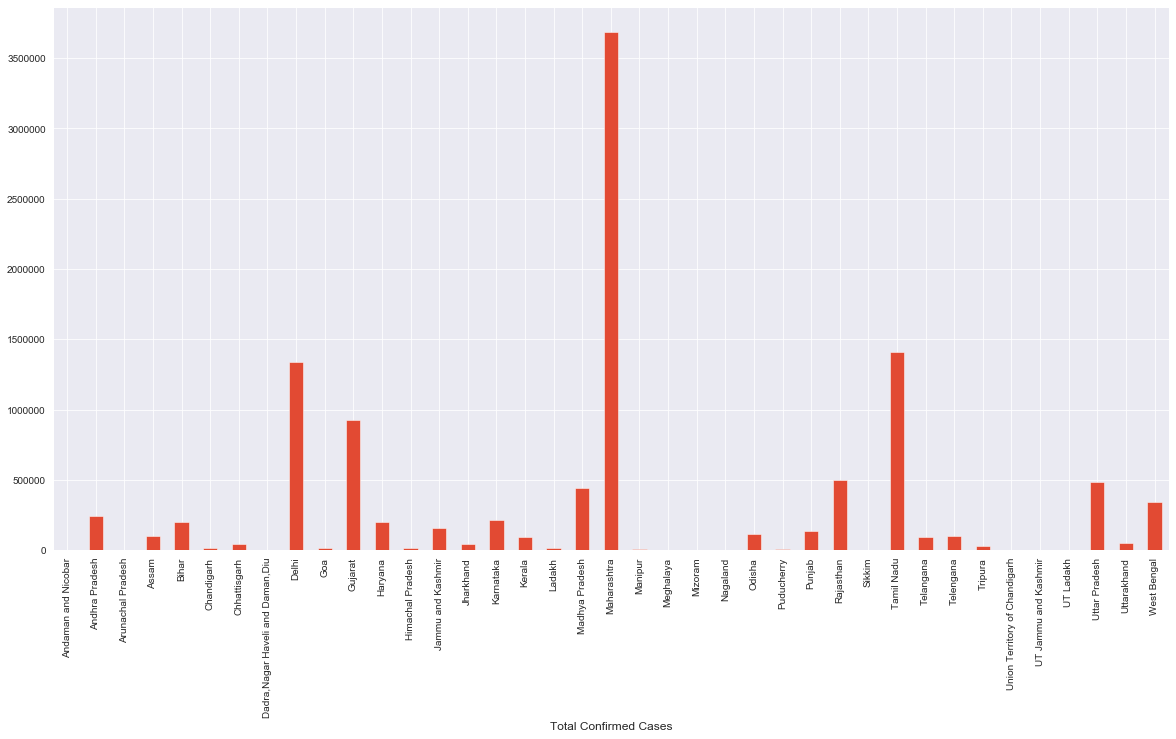

In [257]:
plt.figure(figsize=(20,10))
india['Total Confirmed cases'][:].plot(kind='bar')
plt.xlabel("Total Confirmed Cases");


**Let's Explore the Major affected states:**
 - Maharashtra
 - Tamilnadu
 - Delhi
 - Gujarat

## 1.Maharashtra

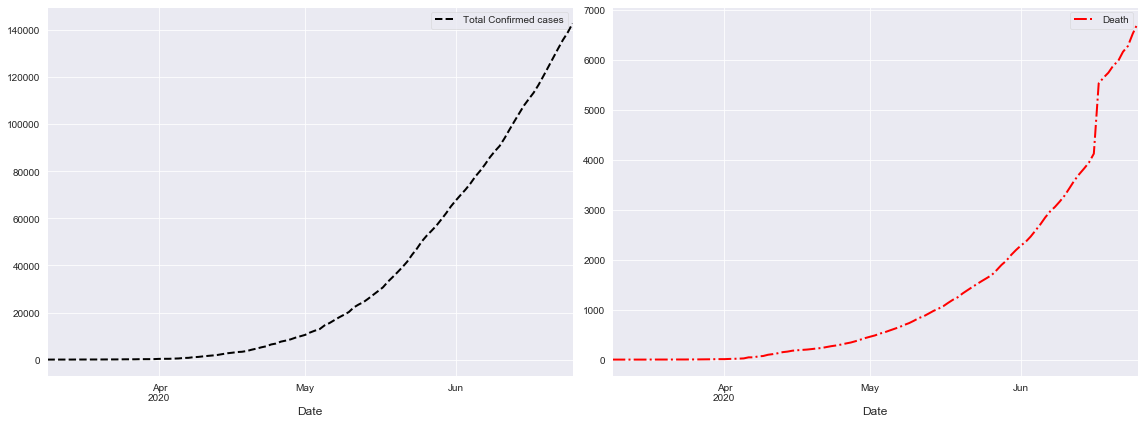

In [154]:
plt.figure(figsize=(16,6))
case=df[df['Name of State / UT']=="Maharashtra"]["Total Confirmed cases"]
death=df[df['Name of State / UT']=="Maharashtra"]["Death"]
plt.subplot(1,2,1)
case.plot(kind='line',legend=True,ls='--',lw=2,color='black')
plt.subplot(1,2,2)
death.plot(kind='line',legend=True,cmap='coolwarm',ls='dashdot',lw=2,color='red');
plt.tight_layout()

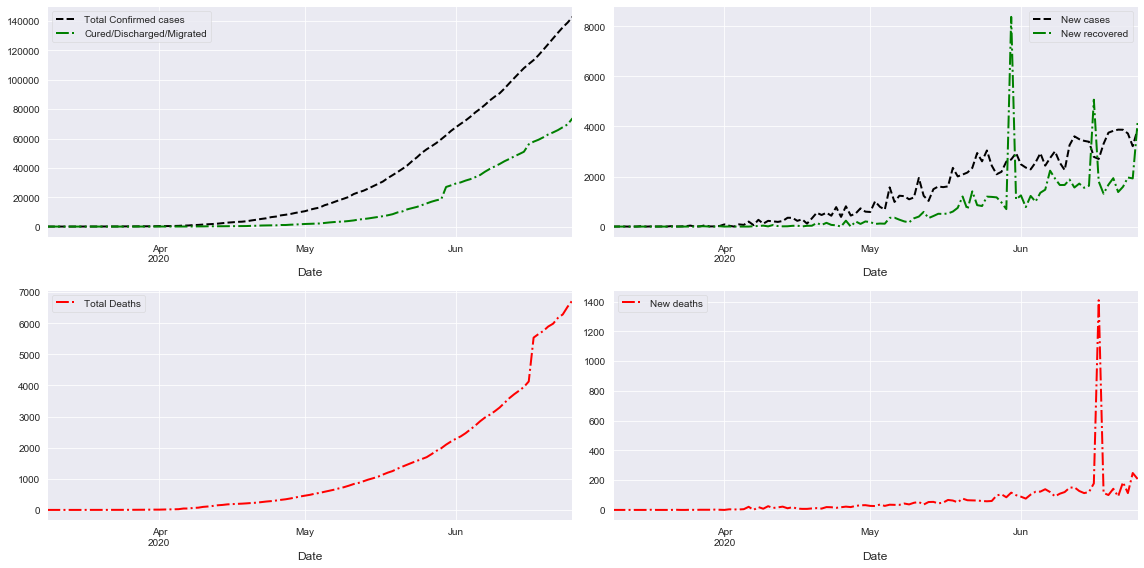

In [155]:
plt.figure(figsize=(16,8))
#Total Confirmed Cases
case=df[df['Name of State / UT']=="Maharashtra"]["Total Confirmed cases"]
#Total Cured
cured=df[df['Name of State / UT']=="Maharashtra"]["Cured/Discharged/Migrated"]
#Total Deaths
death=df[df['Name of State / UT']=="Maharashtra"]["Death"]
#New cases per day
new_case=df[df['Name of State / UT']=="Maharashtra"]["New cases"]
#New deaths per day
new_death=df[df['Name of State / UT']=="Maharashtra"]["New deaths"]
#New recovery per day
new_recovery=df[df['Name of State / UT']=="Maharashtra"]["New recovered"]
#Total Confirmed vs Total Cured
plt.subplot(2,2,1)
case.plot(kind='line',legend=True,ls='--',lw=2,color='black')
cured.plot(kind='line',legend=True,cmap='coolwarm',ls='dashdot',lw=2,color='green');
#New cases per day vs Recovery per day
plt.subplot(2,2,2)
new_case.plot(kind='line',legend=True,ls='--',lw=2,color='black')
new_recovery.plot(kind='line',legend=True,cmap='coolwarm',ls='dashdot',lw=2,color='green');
#Total Deaths
plt.subplot(2,2,3)
death.plot(kind='line',legend=True,cmap='coolwarm',ls='dashdot',lw=2,color='red',label='Total Deaths');
#New Deaths
plt.subplot(2,2,4)
new_death.plot(kind='line',legend=True,cmap='coolwarm',ls='dashdot',lw=2,color='red');
plt.tight_layout()

## 2.Tamil Nadu

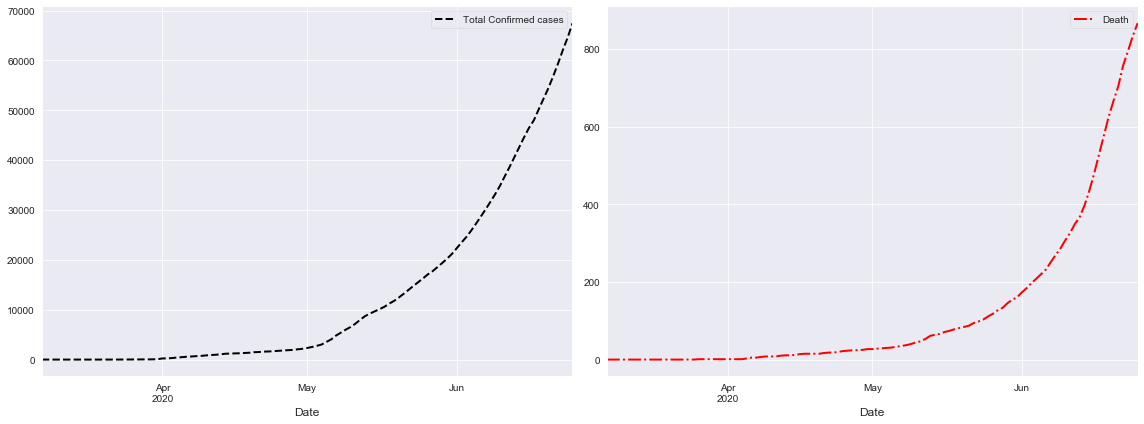

In [170]:
plt.figure(figsize=(16,6))
case=df[df['Name of State / UT']=="Tamil Nadu"]["Total Confirmed cases"]
death=df[df['Name of State / UT']=="Tamil Nadu"]["Death"]
plt.subplot(1,2,1)
case.plot(kind='line',legend=True,ls='--',lw=2,color='black')
plt.subplot(1,2,2)
death.plot(kind='line',legend=True,cmap='coolwarm',ls='dashdot',lw=2,color='red');
plt.tight_layout()

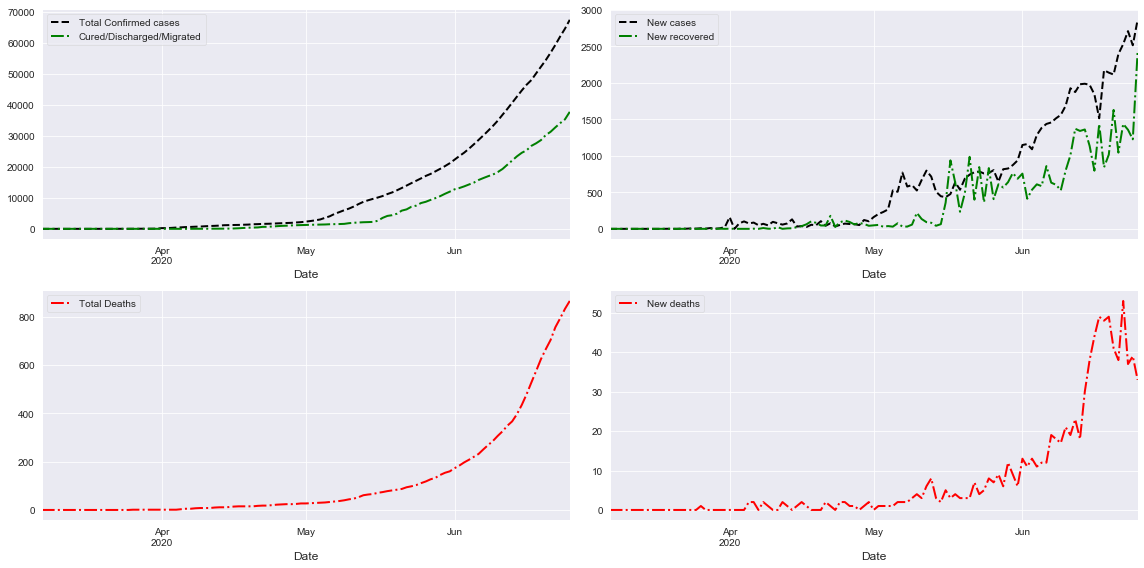

In [148]:
plt.figure(figsize=(16,8))
#Total Confirmed Cases
case=df[df['Name of State / UT']=="Tamil Nadu"]["Total Confirmed cases"]
#Total Cured
cured=df[df['Name of State / UT']=="Tamil Nadu"]["Cured/Discharged/Migrated"]
#Total Deaths
death=df[df['Name of State / UT']=="Tamil Nadu"]["Death"]
#New cases per day
new_case=df[df['Name of State / UT']=="Tamil Nadu"]["New cases"]
#New deaths per day
new_death=df[df['Name of State / UT']=="Tamil Nadu"]["New deaths"]
#New recovery per day
new_recovery=df[df['Name of State / UT']=="Tamil Nadu"]["New recovered"]
#Total Confirmed vs Total Cured
plt.subplot(2,2,1)
case.plot(kind='line',legend=True,ls='--',lw=2,color='black')
cured.plot(kind='line',legend=True,cmap='coolwarm',ls='dashdot',lw=2,color='green');
#New cases per day vs Recovery per day
plt.subplot(2,2,2)
new_case.plot(kind='line',legend=True,ls='--',lw=2,color='black')
new_recovery.plot(kind='line',legend=True,cmap='coolwarm',ls='dashdot',lw=2,color='green');
#Total Deaths
plt.subplot(2,2,3)
death.plot(kind='line',legend=True,cmap='coolwarm',ls='dashdot',lw=2,color='red',label='Total Deaths');
#New Deaths
plt.subplot(2,2,4)
new_death.plot(kind='line',legend=True,cmap='coolwarm',ls='dashdot',lw=2,color='red');
plt.tight_layout()

## 3.Delhi

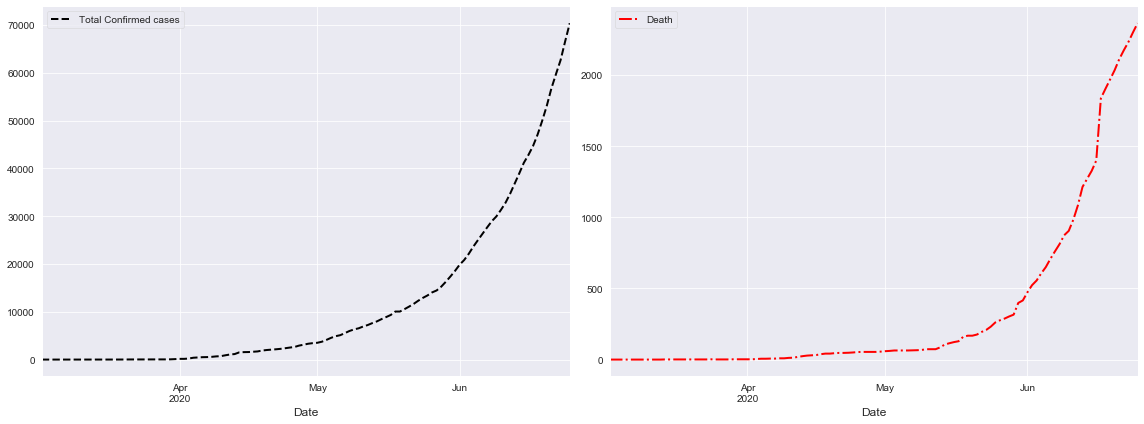

In [166]:
plt.figure(figsize=(16,6))
case=df[df['Name of State / UT']=="Delhi"]["Total Confirmed cases"]
death=df[df['Name of State / UT']=="Delhi"]["Death"]
plt.subplot(1,2,1)
case.plot(kind='line',ls='--',lw=2,color='black')
plt.legend(loc="upper left")
plt.subplot(1,2,2)
death.plot(kind='line',cmap='coolwarm',ls='dashdot',lw=2,color='red');
plt.legend(loc="upper left")
plt.tight_layout()

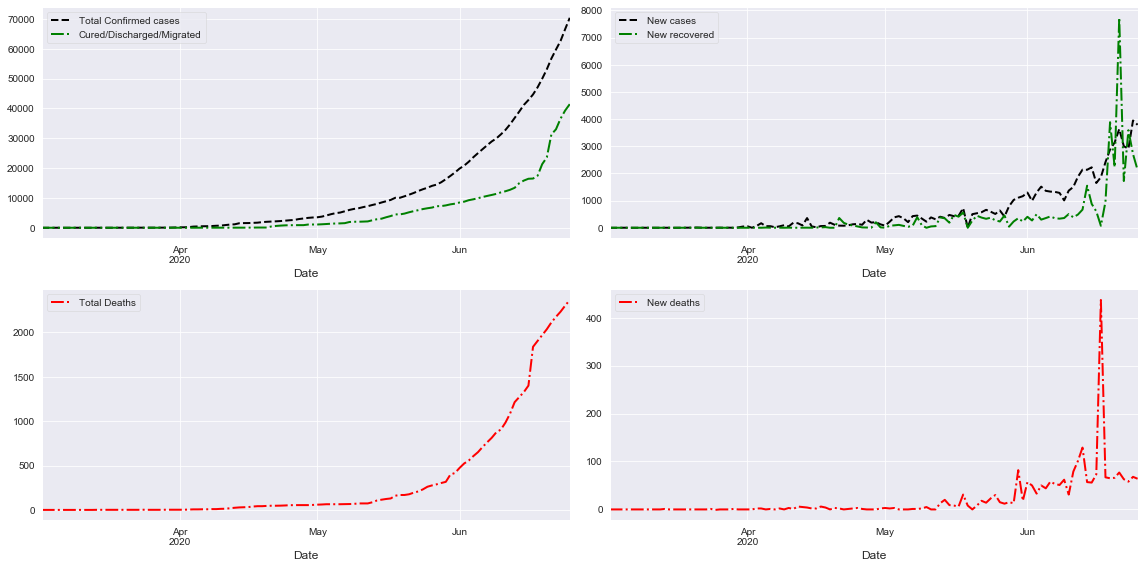

In [167]:
plt.figure(figsize=(16,8))
#Total Confirmed Cases
case=df[df['Name of State / UT']=="Delhi"]["Total Confirmed cases"]
#Total Cured
cured=df[df['Name of State / UT']=="Delhi"]["Cured/Discharged/Migrated"]
#Total Deaths
death=df[df['Name of State / UT']=="Delhi"]["Death"]
#New cases per day
new_case=df[df['Name of State / UT']=="Delhi"]["New cases"]
#New deaths per day
new_death=df[df['Name of State / UT']=="Delhi"]["New deaths"]
#New recovery per day
new_recovery=df[df['Name of State / UT']=="Delhi"]["New recovered"]
#Total Confirmed vs Total Cured
plt.subplot(2,2,1)
case.plot(kind='line',legend=True,ls='--',lw=2,color='black')
cured.plot(kind='line',legend=True,cmap='coolwarm',ls='dashdot',lw=2,color='green');
#New cases per day vs Recovery per day
plt.subplot(2,2,2)
new_case.plot(kind='line',legend=True,ls='--',lw=2,color='black')
new_recovery.plot(kind='line',legend=True,cmap='coolwarm',ls='dashdot',lw=2,color='green');
#Total Deaths
plt.subplot(2,2,3)
death.plot(kind='line',legend=True,cmap='coolwarm',ls='dashdot',lw=2,color='red',label='Total Deaths');
#New Deaths
plt.subplot(2,2,4)
new_death.plot(kind='line',legend=True,cmap='coolwarm',ls='dashdot',lw=2,color='red');
plt.tight_layout()

## 4.Gujarat

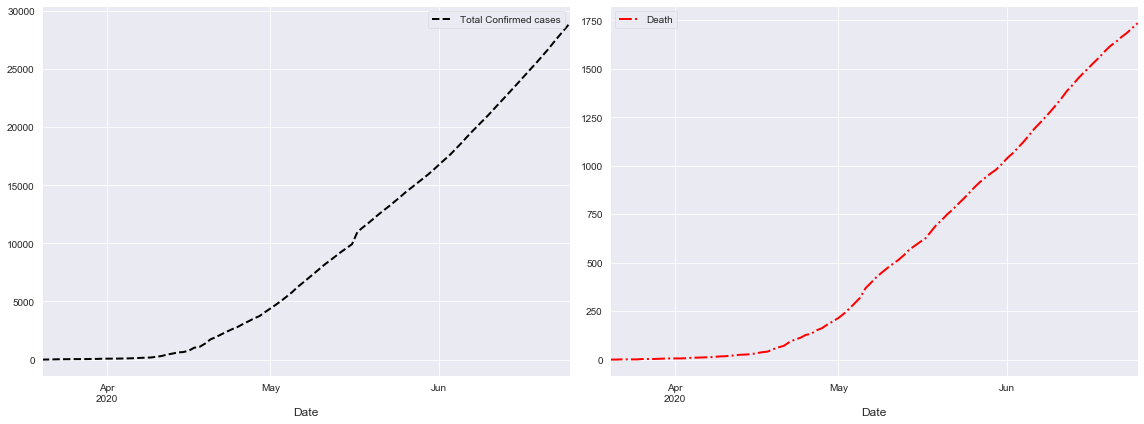

In [171]:
plt.figure(figsize=(16,6))
case=df[df['Name of State / UT']=="Gujarat"]["Total Confirmed cases"]
death=df[df['Name of State / UT']=="Gujarat"]["Death"]
plt.subplot(1,2,1)
case.plot(kind='line',legend=True,ls='--',lw=2,color='black')
plt.subplot(1,2,2)
death.plot(kind='line',legend=True,cmap='coolwarm',ls='dashdot',lw=2,color='red');
plt.tight_layout()

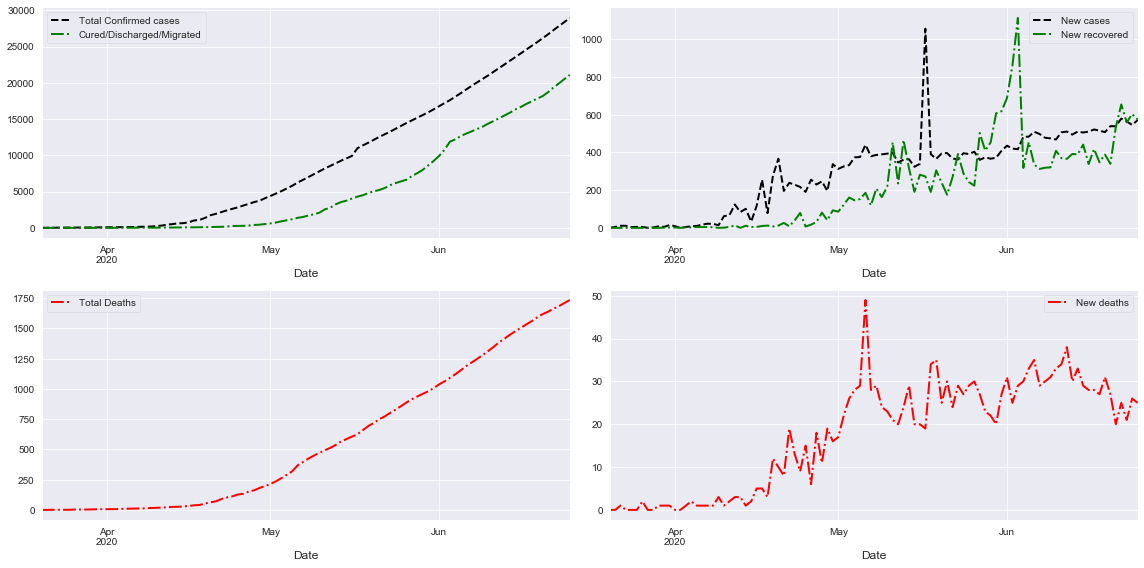

In [172]:
plt.figure(figsize=(16,8))
#Total Confirmed Cases
case=df[df['Name of State / UT']=="Gujarat"]["Total Confirmed cases"]
#Total Cured
cured=df[df['Name of State / UT']=="Gujarat"]["Cured/Discharged/Migrated"]
#Total Deaths
death=df[df['Name of State / UT']=="Gujarat"]["Death"]
#New cases per day
new_case=df[df['Name of State / UT']=="Gujarat"]["New cases"]
#New deaths per day
new_death=df[df['Name of State / UT']=="Gujarat"]["New deaths"]
#New recovery per day
new_recovery=df[df['Name of State / UT']=="Gujarat"]["New recovered"]
#Total Confirmed vs Total Cured
plt.subplot(2,2,1)
case.plot(kind='line',legend=True,ls='--',lw=2,color='black')
cured.plot(kind='line',legend=True,cmap='coolwarm',ls='dashdot',lw=2,color='green');
#New cases per day vs Recovery per day
plt.subplot(2,2,2)
new_case.plot(kind='line',legend=True,ls='--',lw=2,color='black')
new_recovery.plot(kind='line',legend=True,cmap='coolwarm',ls='dashdot',lw=2,color='green');
#Total Deaths
plt.subplot(2,2,3)
death.plot(kind='line',legend=True,cmap='coolwarm',ls='dashdot',lw=2,color='red',label='Total Deaths');
#New Deaths
plt.subplot(2,2,4)
new_death.plot(kind='line',legend=True,cmap='coolwarm',ls='dashdot',lw=2,color='red');
plt.tight_layout()

In [151]:
df['Name of State / UT'].value_counts()

Kerala                                      148
Delhi                                       116
Uttar Pradesh                               114
Rajasthan                                   114
Haryana                                     114
Tamil Nadu                                  111
Karnataka                                   109
Maharashtra                                 109
Punjab                                      109
Andhra Pradesh                              106
Uttarakhand                                 103
Telengana                                   102
Odisha                                      102
Puducherry                                  100
Chhattisgarh                                 99
Gujarat                                      98
West Bengal                                  98
Chandigarh                                   97
Himachal Pradesh                             97
Madhya Pradesh                               97
Jammu and Kashmir                       

In [ ]:
df